In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [2]:
#pip install plotnine #시각화 라이브러리 => R에서 시각화 하는 방법과 유사하게 시각화 한다.
#pip install missingno #누락값(결축치)을 시각화 하는 라이브러리
from plotnine import *
import missingno as msno

In [3]:
# 2015년 10월부터 2018년 7월까지 주택 분양 보증을 받아 분양한 전체 민간 아파트 신규 분양가격 동향
%pwd #linux command 현재 파일 14_Data_Analysis_1이 위치되있는 경로


'C:\\Users\\tk231\\Desktop\\AI Project\\Workspace'

In [4]:
# 현재 화면에 보이는 소스 프로그램의 위치에 저장된 파일 목록을 보여준다
# 현재 폴더 아래에 위치한 폴더에 저장되 파일 목록을 보고싶으면 '%ls 폴더이름'으로 실행한다.
# <DIR> 이라고 써있는거는 파일을 의미한다
%ls data

 Volume in drive C is OS
 Volume Serial Number is 8EAB-B937

 Directory of C:\Users\tk231\Desktop\AI Project\Workspace\data

10/18/2021  03:40 PM    <DIR>          .
10/18/2021  03:40 PM    <DIR>          ..
10/17/2021  06:53 PM           326,362 a_new_hope.txt
10/17/2021  06:53 PM           148,570 alice.txt
10/17/2021  06:53 PM           416,516 alice_color.png
10/17/2021  06:53 PM             7,339 alice_mask.png
09/30/2021  03:13 PM                61 concat_1.csv
09/30/2021  03:13 PM                61 concat_2.csv
09/30/2021  03:13 PM                69 concat_3.csv
10/02/2021  06:31 PM             5,796 country_timeseries.csv
09/28/2021  01:54 PM            83,637 gapminder.tsv
10/17/2021  06:53 PM            99,957 korea_mask.jpg
10/06/2021  01:38 PM               984 pew.csv
10/18/2021  03:40 PM           131,206 preSale_2018_6.csv
09/28/2021  11:50 PM               442 scientists.csv
09/24/2021  11:51 PM            45,122 Seattle2014.csv
10/17/2021  06:53 PM            12,601 st

In [5]:
#read_csv()
pre_sale = pd.read_csv("./Data/preSale_2018_6.csv")
pre_sale.shape

(2805, 5)

In [6]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [7]:
pre_sale.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
2800,제주,전체,2018,6,3925
2801,제주,전용면적 60㎡이하,2018,6,5462
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN
2804,제주,전용면적 102㎡초과,2018,6,3029


In [8]:
pre_sale.dtypes

지역명        object
규모구분       object
연도          int64
월           int64
분양가격(㎡)    object
dtype: object

In [9]:
pre_sale.info()
#분양가격 131데이터가 Null Count이다 그래서 작업이 필요하다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      2805 non-null   object
 1   규모구분     2805 non-null   object
 2   연도       2805 non-null   int64 
 3   월        2805 non-null   int64 
 4   분양가격(㎡)  2674 non-null   object
dtypes: int64(2), object(3)
memory usage: 109.7+ KB


In [10]:
#연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용하는 데이터이므로 문자열 형태로 변환한다.
pre_sale['연도'] = pre_sale['연도'].astype (str)
pre_sale['월'] = pre_sale['월'].astype (str)

In [11]:
# 분양가격 데이터 타입을 숫자로 변경하고 평당 분약가격을 계산한다.
# re_sale['분양가격(㎡)'] = pre_sale['분양가격(㎡)'].astype(float)   #NaN땜에 오류발생
# to_numeric() 함수의 errors 속성을 coerce로 지정하면 오류가 발생된 데이터를 누락값으로 변경한다.
pre_sale['분양가격(㎡)'] = pd.to_numeric(pre_sale['분양가격(㎡)'], errors='coerce') 
#" "공백을 NaN으로 만들었고 나머지 object 타입에서 float로 변환 가능한 데이터들은 다 float로 변환시켰다
pre_sale["평당분양가격"] = pre_sale['분양가격(㎡)'] * 0.3025
pre_sale

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
0,서울,전체,2015,10,5841.0,1766.9025
1,서울,전용면적 60㎡이하,2015,10,5652.0,1709.7300
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,1779.3050
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,1730.6025
4,서울,전용면적 102㎡초과,2015,10,5879.0,1778.3975
...,...,...,...,...,...,...
2800,제주,전체,2018,6,3925.0,1187.3125
2801,제주,전용면적 60㎡이하,2018,6,5462.0,1652.2550
2802,제주,전용면적 60㎡초과 85㎡이하,2018,6,3639.0,1100.7975
2803,제주,전용면적 85㎡초과 102㎡이하,2018,6,NaN,NaN


In [12]:
pre_sale.dtypes

지역명         object
규모구분        object
연도          object
월           object
분양가격(㎡)    float64
평당분양가격     float64
dtype: object

In [13]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      2805 non-null   object 
 1   규모구분     2805 non-null   object 
 2   연도       2805 non-null   object 
 3   월        2805 non-null   object 
 4   분양가격(㎡)  2582 non-null   float64
 5   평당분양가격   2582 non-null   float64
dtypes: float64(2), object(4)
memory usage: 131.6+ KB


In [14]:
# isnull() 함수와 sum() 함수를 사용해서 누락값이 존재하는가 확인하기 
pre_sale.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    223
평당분양가격     223
dtype: int64

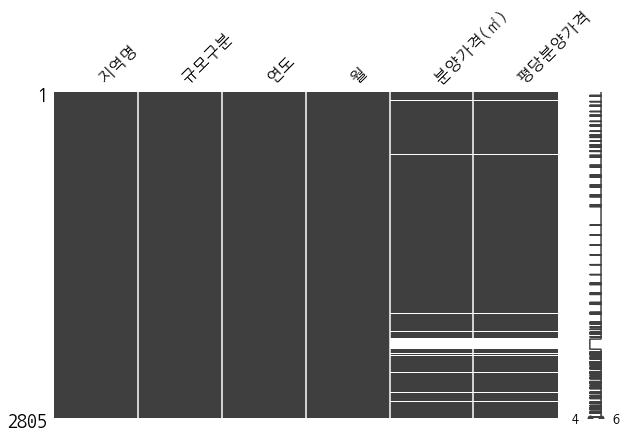

In [15]:
#missingno 라이브러리로 그래프를 그려서 누락값 분포 확인하기 => 중간 중간에 휜색으로 보이는 부분이 누락값을 의미한다.
msno.matrix(pre_sale, figsize=(10, 6))
plt.show()
#휜색 한 줄은 문제가 없지만 크게 뭉처진 하얀 부분은 데이터에 문제를 의미한다. 이 예시에서는 한 지역에 관환 데이터가 잘 입력안된거다.

In [16]:
# 2017년 데이터를 추출한다
#pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
pre_sale_2017

,지역명,규모구분,연도,월,분양가격(㎡),평당분양가격
1275,서울,전체,2017,1,6450.0,1951.1250
1276,서울,전용면적 60㎡이하,2017,1,6662.0,2015.2550
1277,서울,전용면적 60㎡초과 85㎡이하,2017,1,6500.0,1966.2500
1278,서울,전용면적 85㎡초과 102㎡이하,2017,1,7030.0,2126.5750
1279,서울,전용면적 102㎡초과,2017,1,6771.0,2048.2275
...,...,...,...,...,...,...
2290,제주,전체,2017,12,3578.0,1082.3450
2291,제주,전용면적 60㎡이하,2017,12,5380.0,1627.4500
2292,제주,전용면적 60㎡초과 85㎡이하,2017,12,3467.0,1048.7675
2293,제주,전용면적 85㎡초과 102㎡이하,2017,12,NaN,NaN


In [17]:
pre_sale['지역명'].value_counts()   #시도별 데이터가 동일하게 저장되어 있다

경북    165
전북    165
충남    165
전남    165
충북    165
서울    165
세종    165
부산    165
울산    165
제주    165
대전    165
경남    165
경기    165
강원    165
인천    165
대구    165
광주    165
Name: 지역명, dtype: int64

In [18]:
pre_sale['규모구분'].value_counts()  #규모구분별 데이터가 동일하게 저장되어 있다.

전용면적 85㎡초과 102㎡이하    561
전용면적 60㎡초과 85㎡이하     561
전용면적 102㎡초과          561
전체                   561
전용면적 60㎡이하           561
Name: 규모구분, dtype: int64

전국 평균 분양 가격

In [19]:
# pd.options.display.float_format을 사용해서 데이터프레임에 저장된 실수 데이터의 출력 서식을 지정할 수 있다.
# 출력 서식 '{:,.1f}'는 천 단위마다 ','를 출력하고 '.'뒤의 숫자만큼 소수점 아래로 표현한다.
# f를 붙여주지 않으면 실수가 지수기호 'e' 를 사용하는 지수 형태 데이터로 표현된다.
pd.options.display.float_format = '{:,.1f}'.format  #천단위 그리고 소수 1자리

In [20]:
#grouby() 함수와 T 옵션 화용하기
#describe() 함수로 데이터프레임에 저장된 숫자 데이터의 요약 통계량을 확인 할 수 있다
pre_sale.groupby(pre_sale['연도']).describe()

분양가격(㎡)                                                         평당분양가격  \
       count    mean     std     min     25%     50%     75%     max  count   
연도                                                                            
2015   243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5 7,092.0  243.0   
2016   984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5 8,096.0  984.0   
2017   899.0 3,139.5 1,107.6 1,976.0 2,365.0 2,849.0 3,456.0 7,887.0  899.0   
2018   456.0 3,299.4 1,199.3 2,076.0 2,470.5 2,912.5 3,647.2 8,098.0  456.0   

                                                    
      mean   std   min   25%   50%     75%     max  
연도                                                  
2015 843.6 295.5 565.1 673.1 761.1   915.2 2,145.3  
2016 887.6 324.1 574.8 690.3 808.3   952.4 2,449.0  
2017 949.7 335.0 597.7 715.4 861.8 1,045.4 2,385.8  
2018 998.1 362.8 628.0 747.3 881.0 1,103.3 2,449.6

In [21]:
pre_sale.groupby(pre_sale['연도']).describe().T

연도               2015    2016    2017    2018
분양가격(㎡) count   243.0   984.0   899.0   456.0
        mean  2,788.7 2,934.2 3,139.5 3,299.4
        std     976.9 1,071.4 1,107.6 1,199.3
        min   1,868.0 1,900.0 1,976.0 2,076.0
        25%   2,225.0 2,282.0 2,365.0 2,470.5
        50%   2,516.0 2,672.0 2,849.0 2,912.5
        75%   3,025.5 3,148.5 3,456.0 3,647.2
        max   7,092.0 8,096.0 7,887.0 8,098.0
평당분양가격  count   243.0   984.0   899.0   456.0
        mean    843.6   887.6   949.7   998.1
        std     295.5   324.1   335.0   362.8
        min     565.1   574.8   597.7   628.0
        25%     673.1   690.3   715.4   747.3
        50%     761.1   808.3   861.8   881.0
        75%     915.2   952.4 1,045.4 1,103.3
        max   2,145.3 2,449.0 2,385.8 2,449.6

전국 규모별 평균 분양 가격

In [22]:
# pivot_table(values, index, columns, aggfunc, fill_value)
# values: 통계 함수를 적용할 데이터프레임의 열을 지정해준다.
# index: 행 데이터
# columns: 열 데이터
# aggfunc: index와 columns로 그룹화된 values에 적용할 함수를 지정한다 => 기본값은 평균을 계산하는 함수 mean 이다
# fill_value: NaN을 대체할 값을 지정한다 => 주로 0을 사용한다
# columns 와 aggfunc 와 fill_value는 생략할 수 있다
pre_sale.pivot_table("평당분양가격", '규모구분', '연도')


연도,2015,2016,2017,2018
규모구분,,,,
전용면적 102㎡초과,901.7,952.3,"1,039.0","1,032.1"
전용면적 60㎡이하,820.6,861.6,939.2,"1,004.4"
전용면적 60㎡초과 85㎡이하,815.1,852.1,900.6,956.8
전용면적 85㎡초과 102㎡이하,872.5,927.9,966.2,"1,050.2"
전체,815.2,851.9,907.6,968.0


전국 지역별 평균 분양 가격

In [23]:
# 규모구분이 전체로 되어있는 금액으로만 연도별 변동 금액을 살펴보자
region_year_all = pre_sale[pre_sale['규모구분'] == '전체']

In [24]:
# 피벗 테이블 결과는 2번째 인수 (index)가 피벗 테이블의 index로 사용되므로 피벗 테이블의 index를 데이터를 사용하기 위해서 
# 인덱스를 다시 지정하려면 reset.index() 하수를 실행해서 index를 다시 붙여주면 된다
# region_year = region_year_all.pivot_table("평당분양가격", "지역명", "연도")
region_year = region_year_all.pivot_table("평당분양가격", '지역명', '연도').reset_index()
region_year


연도,지역명,2015,2016,2017,2018
0,강원,656.3,642.7,653.3,700.6
1,경기,951.3,"1,028.5","1,086.2","1,178.3"
2,경남,695.3,719.4,744.3,815.3
3,경북,657.3,674.7,714.5,757.3
4,광주,738.1,815.7,867.5,882.7
5,대구,846.3,945.1,"1,050.1","1,068.1"
6,대전,742.3,779.3,829.1,879.0
7,부산,944.8,956.1,"1,061.3","1,165.1"
8,서울,"1,808.1","1,894.2","1,959.5","2,044.1"
9,세종,802.1,812.2,837.4,951.7


전국 지역별 평균 분양가격 변동 금액

In [25]:
#type(region_year) it is a new dataframe
region_year['변동액'] = region_year['2018'] - region_year['2015']
region_year

연도,지역명,2015,2016,2017,2018,변동액
0,강원,656.3,642.7,653.3,700.6,44.3
1,경기,951.3,"1,028.5","1,086.2","1,178.3",227.0
2,경남,695.3,719.4,744.3,815.3,119.9
3,경북,657.3,674.7,714.5,757.3,100.0
4,광주,738.1,815.7,867.5,882.7,144.6
5,대구,846.3,945.1,"1,050.1","1,068.1",221.8
6,대전,742.3,779.3,829.1,879.0,136.6
7,부산,944.8,956.1,"1,061.3","1,165.1",220.3
8,서울,"1,808.1","1,894.2","1,959.5","2,044.1",235.9
9,세종,802.1,812.2,837.4,951.7,149.5


In [26]:
max_delta_price = region_year['변동액'].max()
print('2015부터 2018까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주고 상승액은 평당 {:,.1f} 이다.'.format(max_delta_price))

2015부터 2018까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주고 상승액은 평당 489.1 이다.


In [27]:
max_delta_price = np.max(region_year['변동액'])
print('2015부터 2018까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주고 상승액은 평당 {:,.1f} 이다.'.format(max_delta_price))

2015부터 2018까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주고 상승액은 평당 489.1 이다.


In [28]:
min_delta_data = np.min(region_year['변동액'])
print('2015부터 2018까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역은 {} 상승액은 평당 {:,.1f} 이다.'.format('울산이며', min_delta_data))

2015부터 2018까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역은 울산이며 상승액은 평당 35.5 이다.


In [29]:
mean_delta_data = np.mean(region_year['변동액'])
print('2015부터 2018까지 평균 상승액은 {:,.1f}이였다'.format(mean_delta_data))

2015부터 2018까지 평균 상승액은 152.8이였다


In [30]:
mean_delta_data = region_year['변동액'].mean()
print('2015부터 2018까지 평균 상승액은 {:,.1f}이였다'.format(mean_delta_data))

2015부터 2018까지 평균 상승액은 152.8이였다


plotnine 패키지를 이용한 시각화

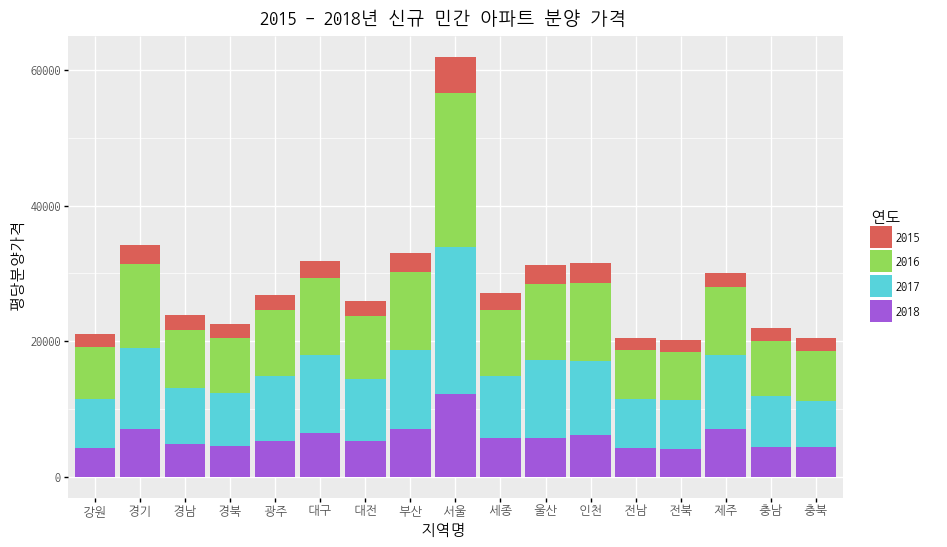

<ggplot: (-9223371885052757027)>

In [31]:
# 전국 지역별 평균 분양가격  시각화
# ggplot(데이터프레임, aes(x = 'x축 데이터', y = 'y축 데이터', fill = '범례'))  #범례 = legend
# geom_bar() 함수는 기본적으로 누적 막대 그래프를 만들어주는데 일반 막대 그래프를 만들려면 position='dodge' 옵션을 지정한다]
ggplot(region_year_all, aes(x = '지역명', y = '평당분양가격', fill = '연도')) \
    + geom_bar(stat = 'identity') \
    + ggtitle('2015 - 2018년 신규 민간 아파트 분양 가격') \
    + theme(text = element_text(family = 'NanumGothicCoding'), figure_size = (10, 6))
    

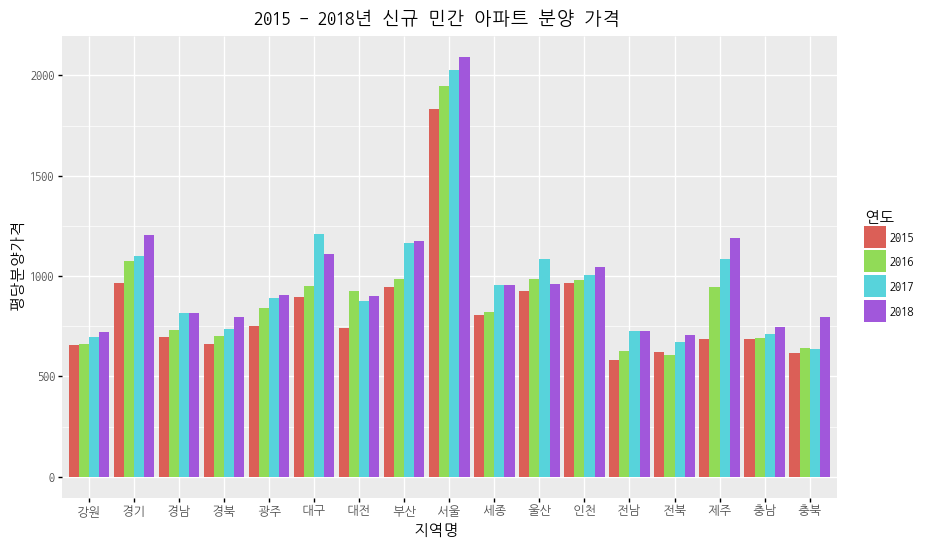

<ggplot: (-9223371885052557375)>

In [32]:
# 전국 지역별 평균 분양가격  시각화
# ggplot(데이터프레임, aes(x = 'x축 데이터', y = 'y축 데이터', fill = '범례'))  #범례 = legend
# geom_bar() 함수는 기본적으로 누적 막대 그래프를 만들어주는데 일반 막대 그래프를 만들려면 position='dodge' 옵션을 지정한다]
ggplot(region_year_all, aes(x = '지역명', y = '평당분양가격', fill = '연도')) \
    + geom_bar(stat = 'identity', position='dodge') \
    + ggtitle('2015 - 2018년 신규 민간 아파트 분양 가격') \
    + theme(text = element_text(family = 'NanumGothicCoding'), figure_size = (10, 6))
    

In [40]:
# 규모별 지역별 평당 분양가격 합계
pre_sale.pivot_table('평당분양가격', '규모구분', '지역명', sum)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
규모구분,,,,,,,,,,,,,,,,,
전용면적 102㎡초과,"23,087.4","39,897.6","27,050.2","25,184.9","24,741.8","36,089.2","15,710.6","36,912.0","64,634.6","27,159.1","22,858.1","39,316.2","22,145.7","22,859.9","27,738.9","24,865.2","23,174.5"
전용면적 60㎡이하,"21,075.2","36,078.9","24,406.3","22,428.6","21,022.5","33,010.3","25,858.9","31,258.5","64,461.8","23,281.9","20,544.3","31,835.7","20,474.7","21,072.1","35,035.6","22,798.2","20,390.0"
전용면적 60㎡초과 85㎡이하,"21,167.1","34,172.8","23,724.8","22,460.9","26,866.8","31,941.3","25,750.9","32,663.6","60,771.9","27,095.2","31,242.5","31,441.5","20,366.7","20,147.4","29,062.7","21,952.7","20,587.8"
전용면적 85㎡초과 102㎡이하,"16,746.4","35,284.2","28,847.0","20,112.3","16,190.7","20,893.1","21,539.2","32,180.9","69,560.8","27,016.6","10,559.4","33,104.7","23,049.3","21,281.2","21,666.3","21,694.1","23,891.8"
전체,"21,070.9","34,214.3","23,798.0","22,472.4","26,841.7","31,839.6","25,972.6","32,972.2","61,972.9","27,074.4","31,176.0","31,465.1","20,409.1","20,173.4","30,007.1","21,923.7","20,434.8"


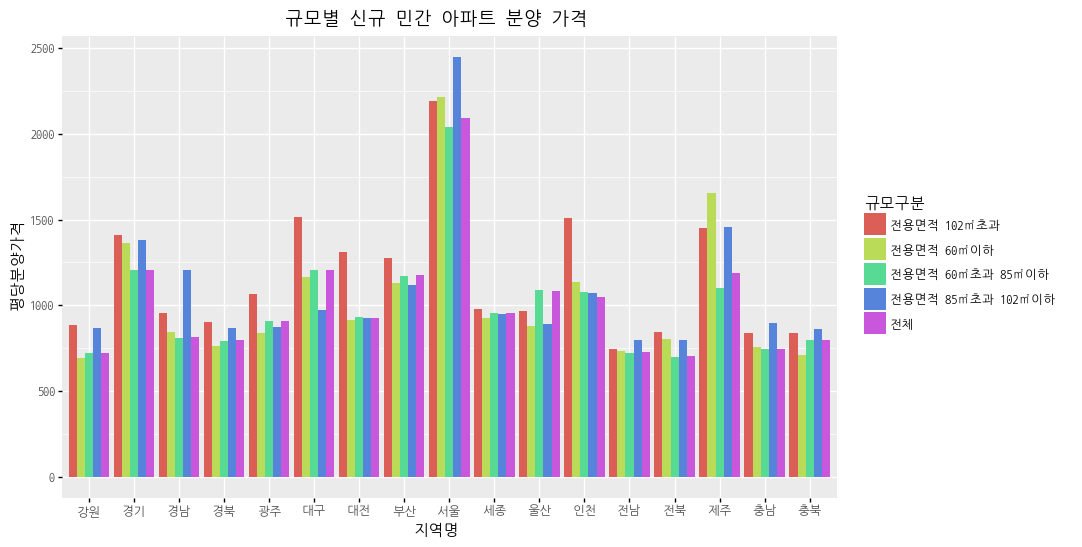

<ggplot: (-9223371885050240782)>

In [53]:
# 규모별 지역별 분양가격 시각화
ggplot(pre_sale, aes(x='지역명', y = '평당분양가격', fill = '규모구분'))  \
    +geom_bar(stat = 'identity', position = 'dodge')   \
    +ggtitle('규모별 신규 민간 아파트 분양 가격')   \
    +theme(text = element_text(family= 'NanumGothicCoding'), figure_size = (10, 6))

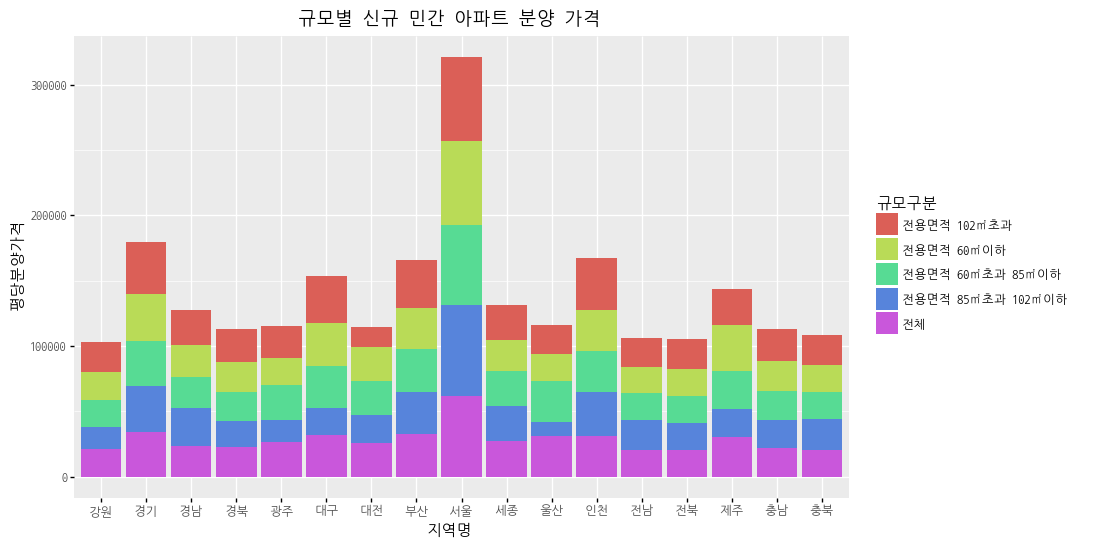

<ggplot: (-9223371885052460733)>

In [62]:
# 규모별 지역별 분양가격 시각화
ggplot(pre_sale, aes(x='지역명', y = '평당분양가격', fill = '규모구분'))  \
    +geom_bar(stat = 'identity')   \
    +ggtitle('규모별 신규 민간 아파트 분양 가격')   \
    +theme(text = element_text(family= 'NanumGothicCoding'), figure_size = (10, 6))

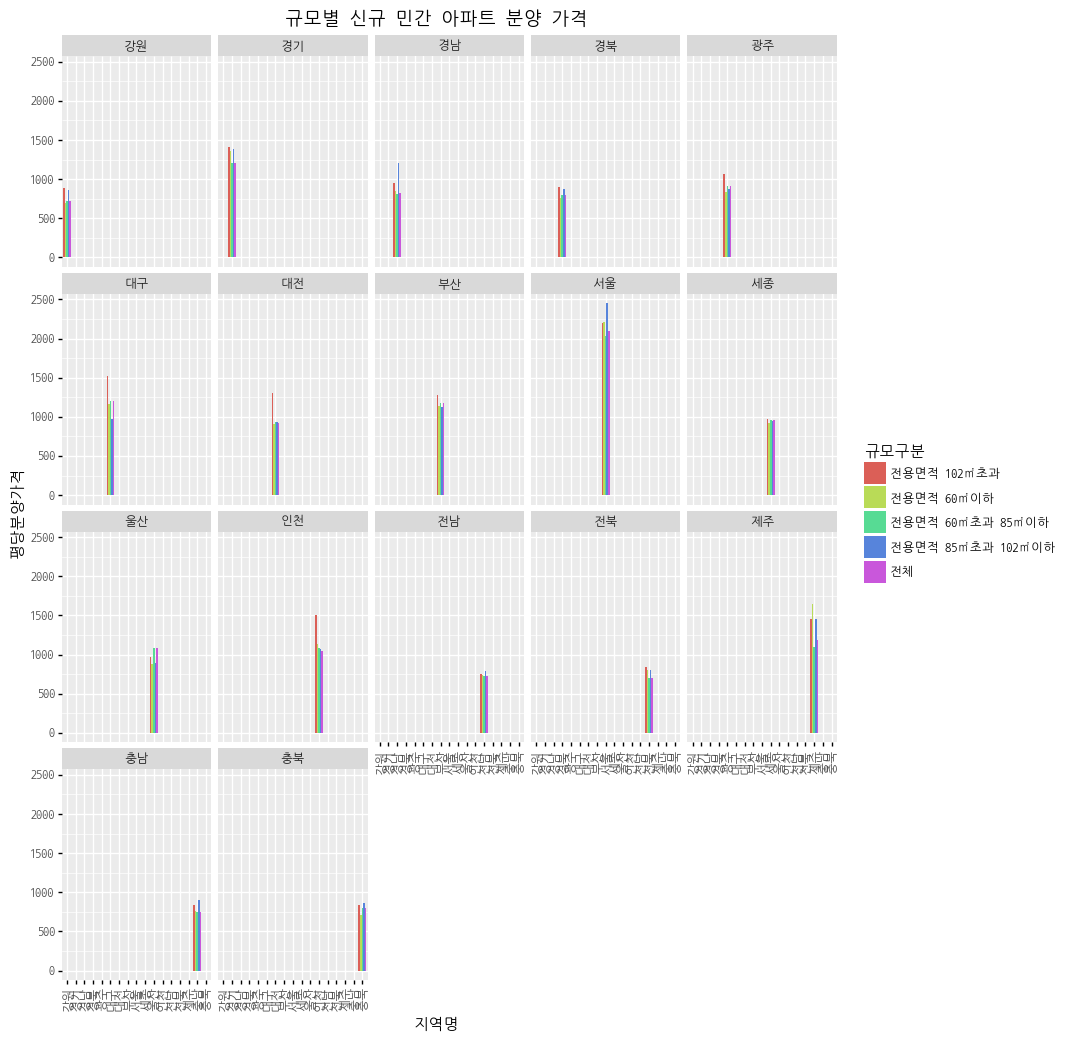

<ggplot: (-9223371885048446285)>

In [81]:
# 규모별 지역별 분양가격 시각화
# 한 그래프가 한 지역을 의미하니까 aex(x = '지역명')을 할 필요가 없다. 이것을 수정 하지 않으면 각 그래프가 보여주는 데이터가 너무 제한된다
ggplot(pre_sale, aes(x='지역명', y = '평당분양가격', fill = '규모구분'))  \
    +geom_bar(stat = 'identity', position = 'dodge')   \
    +facet_wrap('지역명')   \
    +ggtitle('규모별 신규 민간 아파트 분양 가격')   \
    +theme(text = element_text(family= 'NanumGothicCoding'), figure_size = (10, 12), axis_text_x = element_text(rotation = 90))

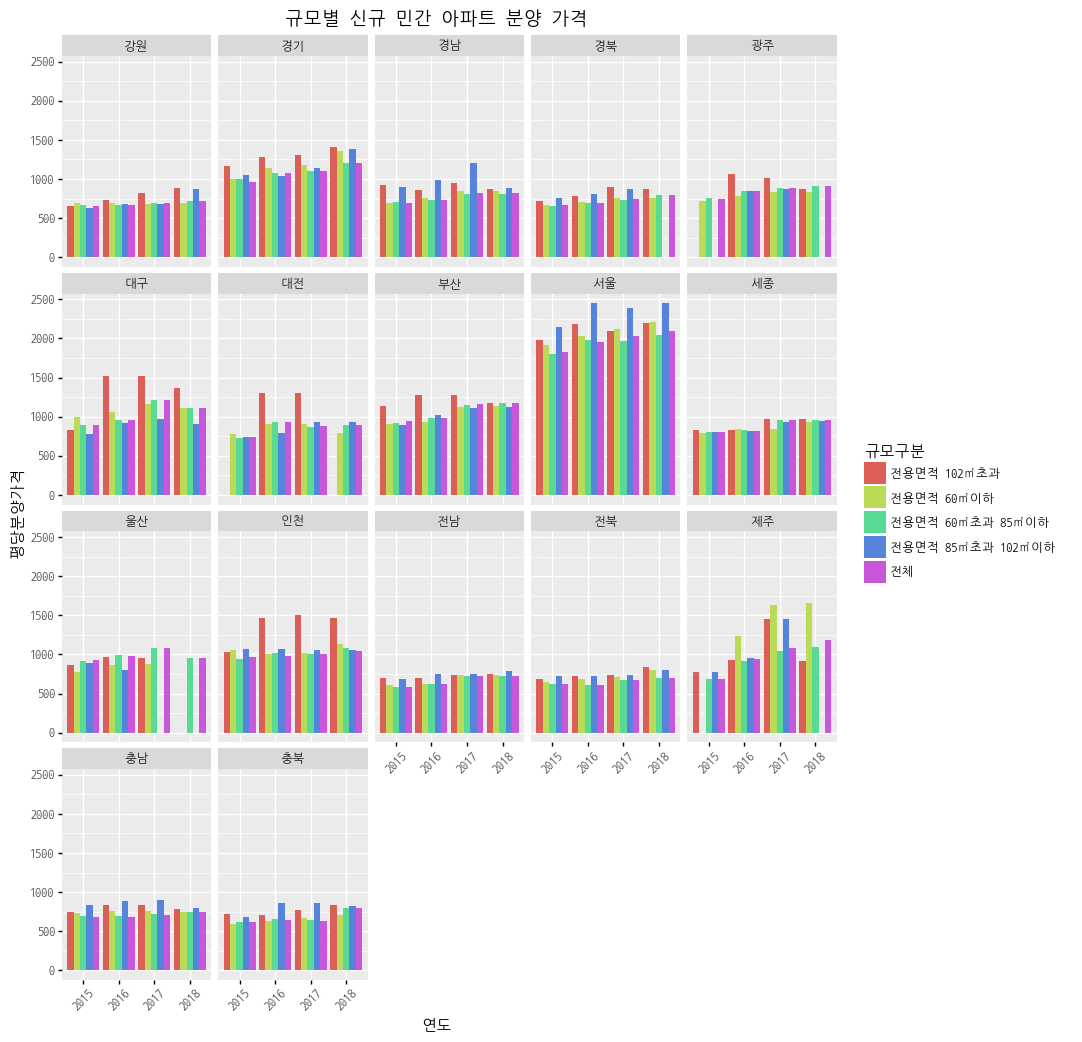

<ggplot: (151805989247)>

In [78]:
# 규모별 지역별 분양가격 시각화
ggplot(pre_sale, aes(x='연도', y = '평당분양가격', fill = '규모구분'))  \
    +geom_bar(stat = 'identity', position = 'dodge')   \
    +facet_wrap('지역명')   \
    +ggtitle('규모별 신규 민간 아파트 분양 가격')   \
    +theme(text = element_text(family= 'NanumGothicCoding'), figure_size = (10, 12), axis_text_x = element_text(rotation=45))

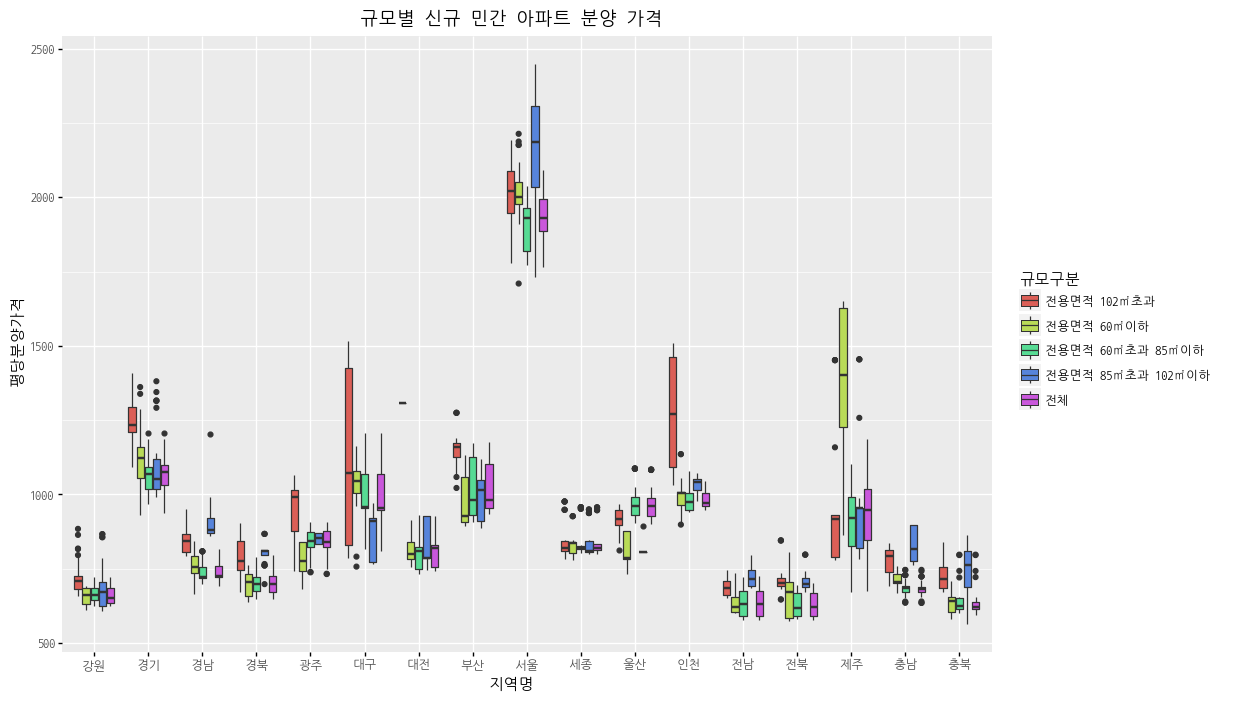

<ggplot: (-9223371885048819652)>

In [86]:
# boxplot
# 규모별 지역별 분양가격 시각화
ggplot(pre_sale, aes(x='지역명', y = '평당분양가격', fill = '규모구분'))  \
    +geom_boxplot()  \
    +ggtitle('규모별 신규 민간 아파트 분양 가격')   \
    +theme(text = element_text(family= 'NanumGothicCoding'), figure_size = (12, 8))
    # 쩜은 이상치 (극단값)이며 다시 검토할 필요가 있다.

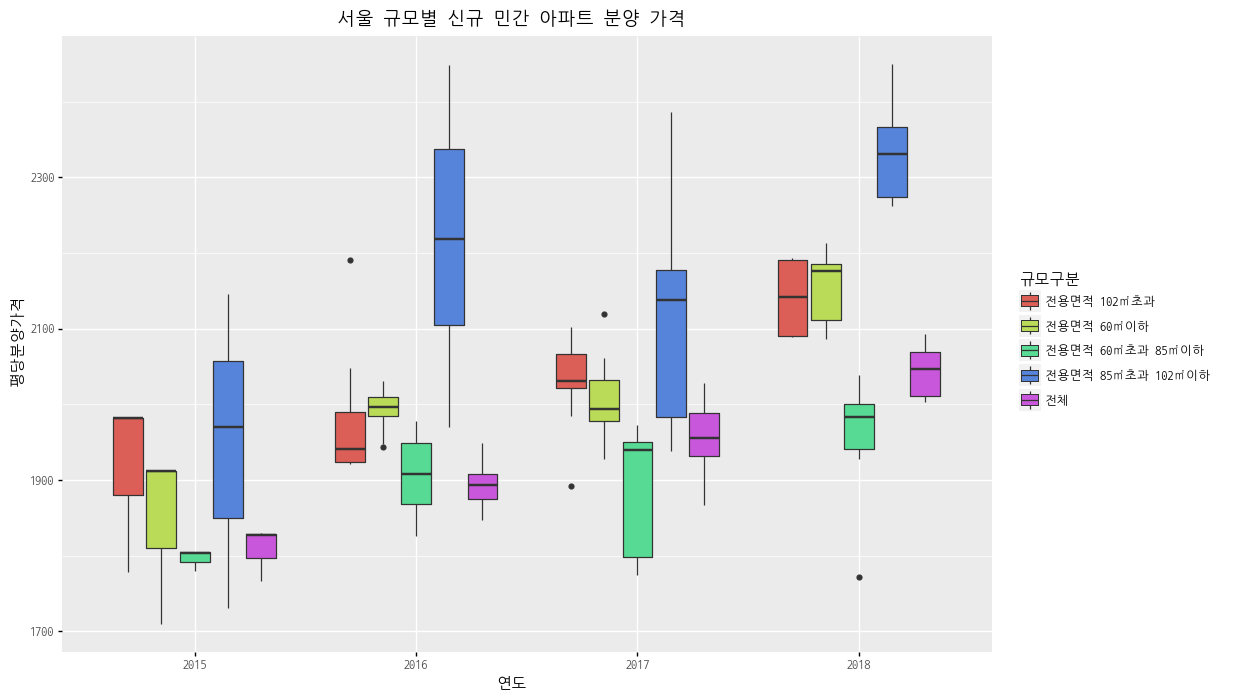

<ggplot: (-9223371885048600695)>

In [90]:
# 사업 규모가 가장 큰 서울
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']
# boxplot
# 규모별 서울 분양가격 시각화
ggplot(pre_sale_seoul, aes(x='연도', y = '평당분양가격', fill = '규모구분'))  \
    +geom_boxplot()  \
    +ggtitle('서울 규모별 신규 민간 아파트 분양 가격')   \
    +theme(text = element_text(family= 'NanumGothicCoding'), figure_size = (12, 8))
    # 쩜은 이상치 (극단값)이며 다시 검토할 필요가 있다.

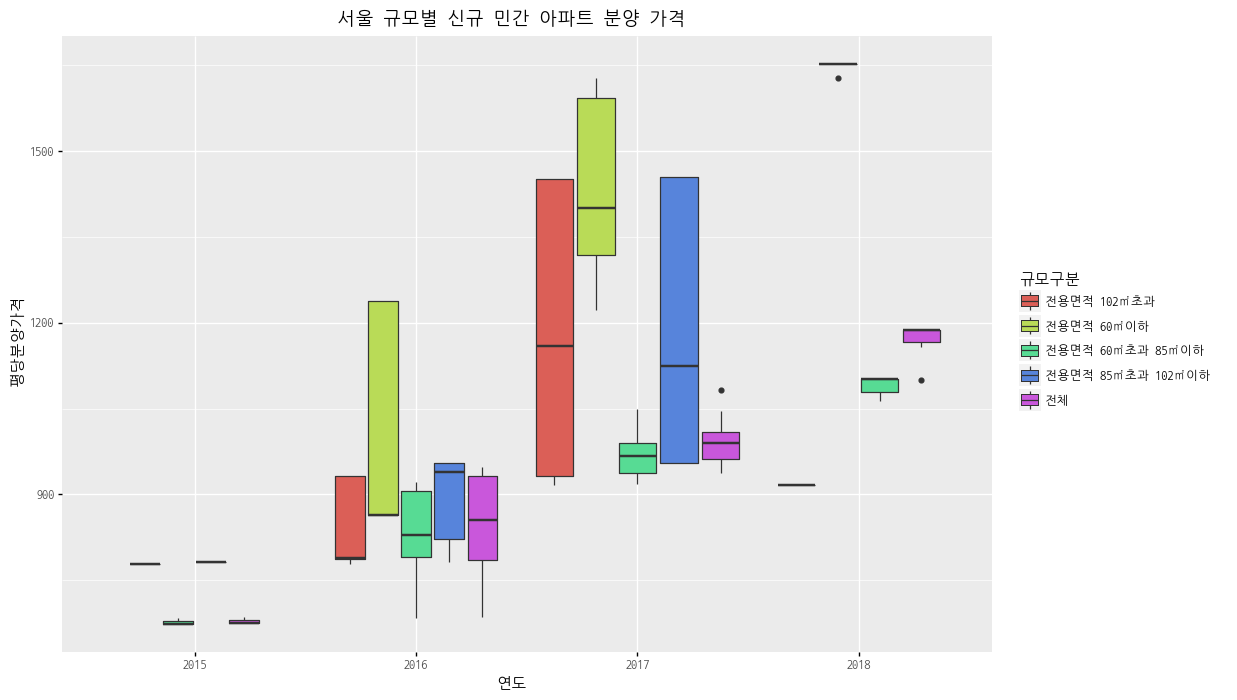

<ggplot: (-9223371885048308925)>

In [92]:
# 분양가 차이가 가장 컸던 제주
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']
# boxplot
# 규모별 제주 분양가격 시각화
ggplot(pre_sale_jeju, aes(x='연도', y = '평당분양가격', fill = '규모구분'))  \
    +geom_boxplot()  \
    +ggtitle('제주 규모별 신규 민간 아파트 분양 가격')   \
    +theme(text = element_text(family= 'NanumGothicCoding'), figure_size = (12, 8))
    # 쩜은 이상치 (극단값)이며 다시 검토할 필요가 있다.

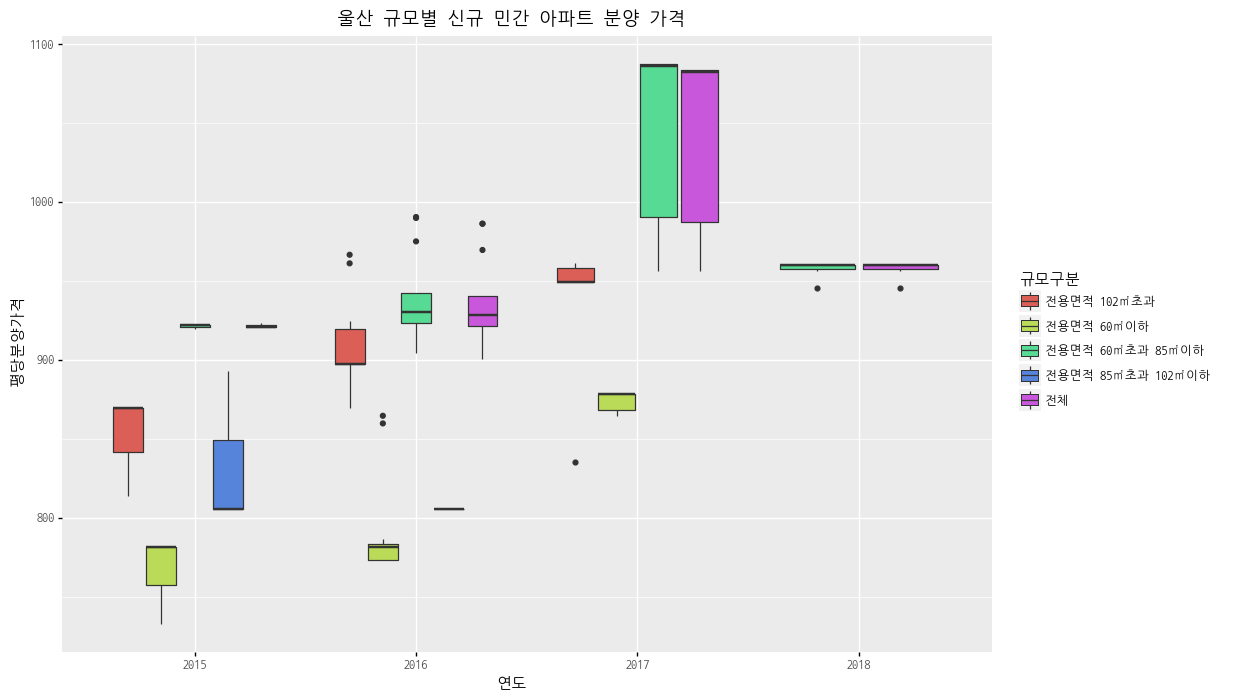

<ggplot: (151805840893)>

In [94]:
# 분양가 차이가 가장 작았던 울산
pre_sale_ulsan = pre_sale[pre_sale['지역명'] == '울산']
# boxplot
# 규모별 울산 분양가격 시각화
ggplot(pre_sale_ulsan, aes(x='연도', y = '평당분양가격', fill = '규모구분'))  \
    +geom_boxplot()  \
    +ggtitle('울산 규모별 신규 민간 아파트 분양 가격')   \
    +theme(text = element_text(family= 'NanumGothicCoding'), figure_size = (12, 8))
    # 쩜은 이상치 (극단값)이며 다시 검토할 필요가 있다.